In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score, explained_variance_score

# Cargamos los datos desde el CSV
df = pd.read_csv('DATOS_PREPROCESADOS_3.csv')

# Eliminamos la columna identificadora que no aporta a la predicción
df.drop("gidenpac", axis=1, inplace=True)

# Convertimos la variable categórica 'gdiagalt' a variables dummy (one-hot encoding)
df = pd.get_dummies(df, columns=["gdiagalt"], drop_first=True)

# Definimos la variable objetivo y las características.
X = df.drop(["gsitalta", "ds_vivo_alta", "ds_estancia", "ds_post_oper", "ds_pre_oper"], axis=1)
y = df["ds_pre_oper"]

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos y entrenamos el modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Realizamos predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Calculamos las métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)

# Imprimimos las métricas
print("Error cuadrático medio (MSE):", mse)
print("Error absoluto medio (MAE):", mae)
print("Error absoluto mediano:", medae)
print("R² (coeficiente de determinación):", r2)
print("Varianza explicada:", explained_var)


Error cuadrático medio (MSE): 3.9057794871794873
Error absoluto medio (MAE): 1.5846153846153845
Error absoluto mediano: 1.27
R² (coeficiente de determinación): -0.4137769157544027
Varianza explicada: -0.2907146596858641


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

# Cargamos los datos
df = pd.read_csv('/home/ubuntu/STG-fractura_cadera/models_v2/PREPROCESADO_3/DATOS_PREPROCESADOS_3.csv')

# Eliminar filas con "-999" o -999 en cualquier columna
df = df[~df.isin(["-999", -999]).any(axis=1)]

# Elimina la columna identificadora
df.drop("gidenpac", axis=1, inplace=True)

# Seleccionamos X e y. Eliminamos de X las columnas que no queremos usar como features
X = df.drop(["gsitalta", "ds_vivo_alta", "ds_estancia", "ds_post_oper", "ds_pre_oper"], axis=1)
y = df["ds_pre_oper"]

# Identificamos columnas numéricas y categóricas (suponiendo que las de tipo object son categóricas)
num_cols = X.select_dtypes(include=[np.number]).columns
cat_cols = X.select_dtypes(include=["object"]).columns

# Creamos un preprocesador que escale los numéricos y aplique OneHotEncoder a los categóricos
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

# Definimos un Pipeline que primero preprocesa y luego entrena un modelo de Gradient Boosting
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(random_state=42))
])

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configuramos un GridSearch para ajustar hiperparámetros del Gradient Boosting
param_grid = {
    "regressor__n_estimators": [100, 200],
    "regressor__max_depth": [3, 5, 7],
    "regressor__learning_rate": [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Mejores parámetros encontrados:", grid_search.best_params_)

# Realizamos predicciones sobre el conjunto de prueba
y_pred = grid_search.predict(X_test)

# Calculamos las métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)
print("Varianza explicada:", explained_var)


Mejores parámetros encontrados: {'regressor__learning_rate': 0.01, 'regressor__max_depth': 3, 'regressor__n_estimators': 100}
MSE: 3.22047554656255
MAE: 1.4328331675617267
R²: -0.16571711240400733
Varianza explicada: -0.08696492102488573


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

# Cargamos el dataset
df = pd.read_csv('/home/ubuntu/STG-fractura_cadera/models_v2/PREPROCESADO_3/DATOS_PREPROCESADOS_3.csv')

# Eliminar filas que contengan "-999" o -999 en cualquier columna
df = df[~df.isin(["-999", -999]).any(axis=1)]

# Eliminamos la columna identificadora
df.drop("gidenpac", axis=1, inplace=True)

# Lista de variables categóricas
cat_features = [
    'gsitalta','itipsexo', 'itipingr', 'ireingre', 'iotrocen', 'gdiagalt',
    'ds_izq_der', 'ds_turno', 'ds_dia_semana_llegada', 'ds_mes_llegada',
    'ds_centro_afueras', 'ds_alergia_medicamentosa','movilidad', 'riesgo_caida', 'ds_alergia_alimenticia',
    'ds_otras_alergias', 'ds_ITU', 'ds_anemia',
    'ds_vitamina_d', 'ds_insuficiencia_respiratoria', 'ds_insuficiencia_cardiaca',
    'ds_deterioro_cognitivo', 'ds_insuficiencia_renal', 'ds_HTA', 'ds_diabetes'
]

# Convertir las variables de la lista a tipo 'category'
for col in cat_features:
    if col in df.columns:
        df[col] = df[col].astype("category")

# Verifica los tipos de datos
print("Tipos de datos después de la conversión:")
print(df.dtypes)

# Definimos las features y la variable objetivo
# En este ejemplo, eliminamos las columnas que no queremos usar como predictores
X = df.drop(["gsitalta", "ds_vivo_alta", "ds_estancia", "ds_post_oper", "ds_pre_oper"], axis=1)
y = df["ds_pre_oper"]

# Identificamos columnas numéricas y categóricas:
# Aseguramos que las variables categóricas estén en la lista de columnas tipo 'object' o 'category'
num_cols = X.select_dtypes(include=[np.number]).columns
cat_cols = X.select_dtypes(include=["object", "category"]).columns
print("\nVariables categóricas que se utilizarán:", list(cat_cols))

# Creamos un preprocesador: escalamos variables numéricas y codificamos variables categóricas
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

# Definimos un pipeline que incluya el preprocesamiento y el modelo XGBoost
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", XGBRegressor(random_state=42, objective="reg:squarederror"))
])

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definimos una búsqueda de hiperparámetros para XGBoost
param_grid = {
    "regressor__n_estimators": [100, 200, 300],
    "regressor__max_depth": [3, 5, 7],
    "regressor__learning_rate": [0.01, 0.1, 0.2],
    "regressor__subsample": [0.8, 1.0]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
grid_search.fit(X_train, y_train)

print("\nMejores parámetros encontrados:", grid_search.best_params_)

# Predicciones y evaluación
y_pred = grid_search.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)

print("\nError cuadrático medio (MSE):", mse)
print("Error absoluto medio (MAE):", mae)
print("R² (coeficiente de determinación):", r2)
print("Varianza explicada:", explained_var)

# Verificar qué columnas (features) se han generado en el preprocesamiento
preprocessor_final = grid_search.best_estimator_.named_steps["preprocessor"]

# Obtener los nombres de las columnas resultantes (requiere scikit-learn >= 1.0)
try:
    feature_names = preprocessor_final.get_feature_names_out()
    print("\nCaracterísticas utilizadas por el modelo:")
    print(feature_names)
except AttributeError:
    print("\nLa versión de scikit-learn no soporta 'get_feature_names_out()'.")


Tipos de datos después de la conversión:
itipsexo                         category
itipingr                         category
ireingre                         category
gsitalta                         category
iotrocen                         category
gdiagalt                         category
ds_izq_der                       category
ds_turno                         category
ds_edad                             int64
ds_estancia                         int64
ds_pre_oper                         int64
ds_post_oper                        int64
ds_vivo_alta                        int64
ds_dia_semana_llegada            category
ds_mes_llegada                   category
ds_centro_afueras                category
ds_alergia_medicamentosa         category
ds_alergia_alimenticia           category
ds_otras_alergias                category
movilidad                           int64
Barthel                             int64
braden                              int64
riesgo_caida                       

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   gidenpac                       193 non-null    object
 1   itipsexo                       193 non-null    int64 
 2   itipingr                       193 non-null    int64 
 3   ireingre                       193 non-null    int64 
 4   gsitalta                       193 non-null    int64 
 5   iotrocen                       193 non-null    int64 
 6   gdiagalt                       193 non-null    object
 7   ds_izq_der                     193 non-null    int64 
 8   ds_turno                       193 non-null    int64 
 9   ds_edad                        193 non-null    int64 
 10  ds_estancia                    193 non-null    int64 
 11  ds_pre_oper                    193 non-null    int64 
 12  ds_post_oper                   193 no

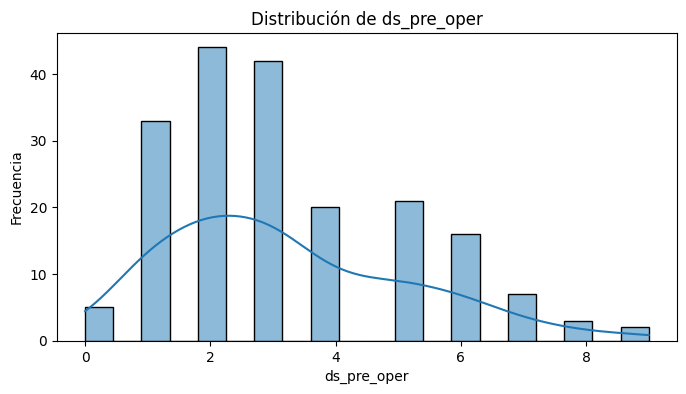

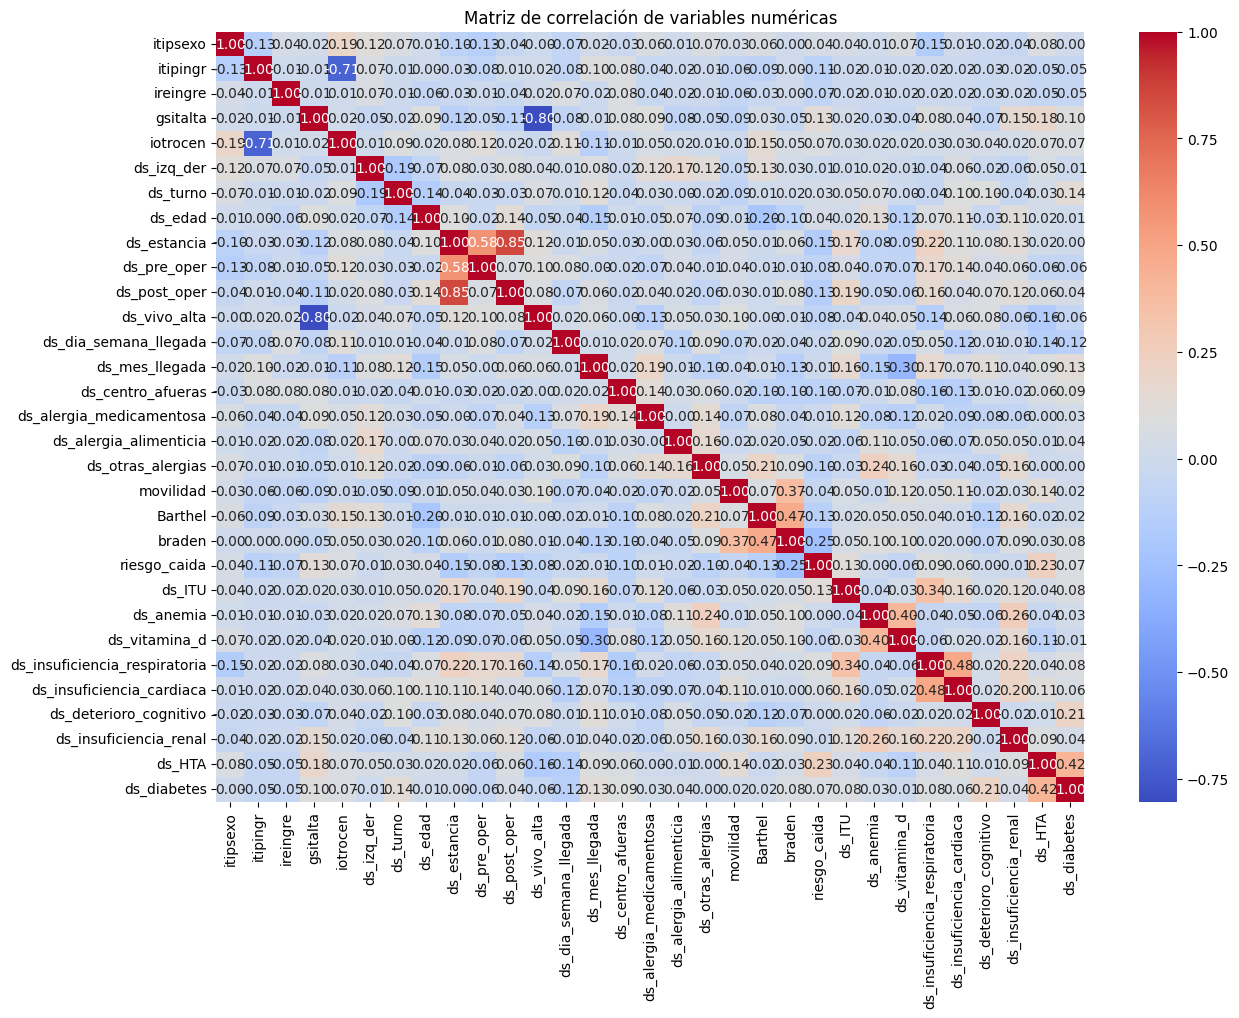


Correlación de cada variable numérica con ds_pre_oper:
ds_estancia                      0.578365
ds_insuficiencia_respiratoria    0.174555
ds_insuficiencia_cardiaca        0.135497
iotrocen                         0.116964
ds_vivo_alta                     0.100089
ds_dia_semana_llegada            0.078805
ds_post_oper                     0.066784
ds_insuficiencia_renal           0.059648
ds_deterioro_cognitivo           0.040866
movilidad                        0.037951
ds_alergia_alimenticia           0.035438
ds_ITU                           0.035388
ds_izq_der                       0.031498
ds_mes_llegada                  -0.001339
ireingre                        -0.007746
Barthel                         -0.010803
ds_otras_alergias               -0.013486
braden                          -0.014612
ds_centro_afueras               -0.019547
ds_edad                         -0.021916
ds_turno                        -0.025288
gsitalta                        -0.051772
ds_HTA              

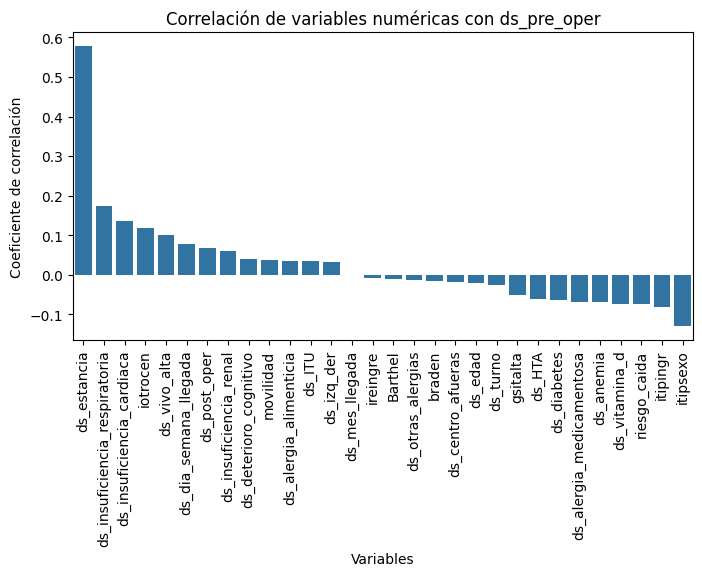

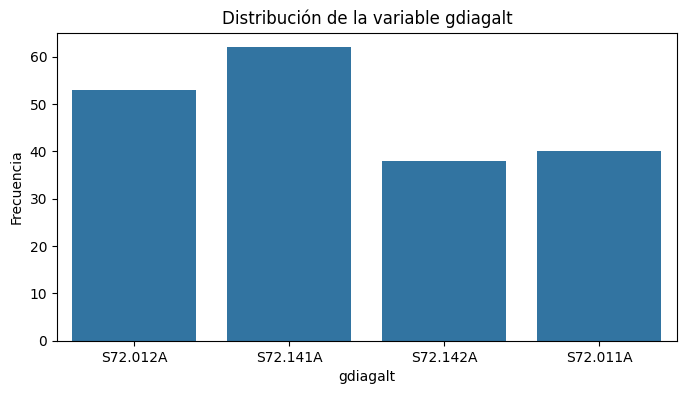


Variables numéricas seleccionadas (|correlación| >= 0.1):
['ds_estancia', 'ds_insuficiencia_respiratoria', 'ds_insuficiencia_cardiaca', 'iotrocen', 'ds_vivo_alta', 'itipsexo']


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos el dataset preprocesado
df = pd.read_csv('DATOS_PREPROCESADOS_3.csv')

# Información general del DataFrame
print("Información del DataFrame:")
df.info()
print("\nEstadísticas descriptivas:")
print(df.describe())

# Verificamos la existencia de valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Revisamos la distribución de la variable objetivo ds_pre_oper
plt.figure(figsize=(8, 4))
sns.histplot(df['ds_pre_oper'], kde=True, bins=20)
plt.title("Distribución de ds_pre_oper")
plt.xlabel("ds_pre_oper")
plt.ylabel("Frecuencia")
plt.show()

# Matriz de correlación para las variables numéricas
plt.figure(figsize=(14, 10))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación de variables numéricas")
plt.show()

# Selección de variables: análisis de correlación con ds_pre_oper
# Ordenamos las correlaciones de las variables numéricas con ds_pre_oper
target = "ds_pre_oper"
correlations = correlation_matrix[target].drop(target)
correlations = correlations.sort_values(ascending=False)
print("\nCorrelación de cada variable numérica con ds_pre_oper:")
print(correlations)

# Visualizamos las variables más correlacionadas
plt.figure(figsize=(8, 4))
sns.barplot(x=correlations.index, y=correlations.values)
plt.xticks(rotation=90)
plt.title("Correlación de variables numéricas con ds_pre_oper")
plt.ylabel("Coeficiente de correlación")
plt.xlabel("Variables")
plt.show()

# Análisis de variables categóricas:
# Revisamos la distribución de una variable categórica de interés, por ejemplo "gdiagalt"
if "gdiagalt" in df.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x="gdiagalt")
    plt.title("Distribución de la variable gdiagalt")
    plt.xlabel("gdiagalt")
    plt.ylabel("Frecuencia")
    plt.show()

# Selección de variables (inicial):
# - Variables con correlación absoluta mayor a un umbral (por ejemplo, 0.1) se consideran relevantes
threshold = 0.1
selected_vars = correlations[abs(correlations) >= threshold].index.tolist()
print("\nVariables numéricas seleccionadas (|correlación| >= {}):".format(threshold))
print(selected_vars)

# También se pueden considerar variables categóricas que tengan relevancia teórica.
# En este análisis, las variables numéricas con correlación moderada a ds_pre_oper se han seleccionado.


Categorías en 'gdiagalt':
gdiagalt
S72.141A    62
S72.012A    53
S72.011A    40
S72.142A    38
Name: count, dtype: int64


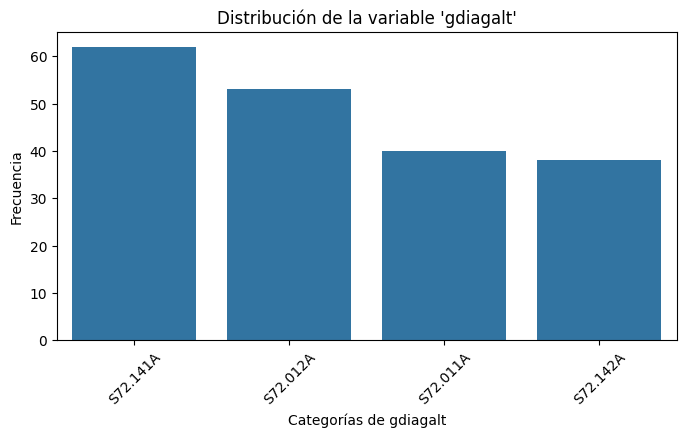

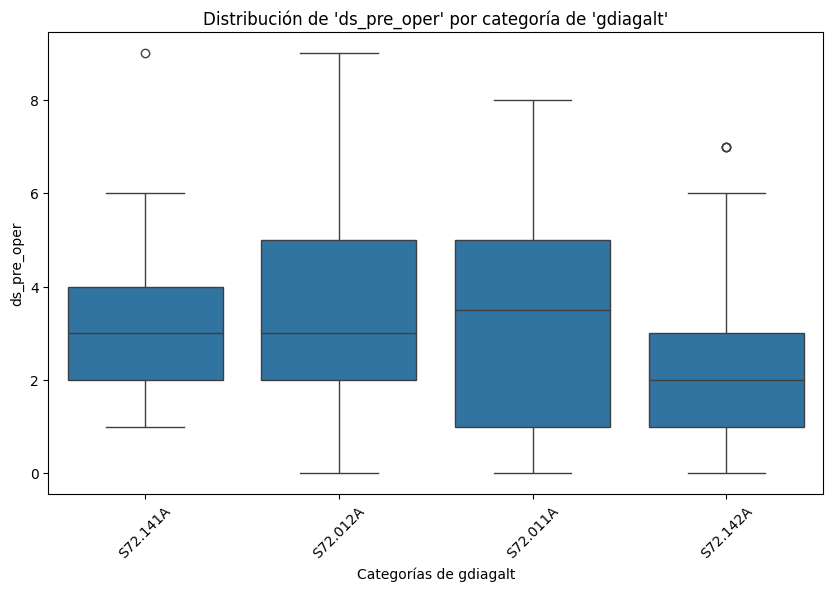


Estadísticas descriptivas de ds_pre_oper por gdiagalt:
          count      mean       std  min  25%  50%  75%  max
gdiagalt                                                    
S72.011A   40.0  3.450000  2.218223  0.0  1.0  3.5  5.0  8.0
S72.012A   53.0  3.471698  1.947422  0.0  2.0  3.0  5.0  9.0
S72.141A   62.0  3.145161  1.677691  1.0  2.0  3.0  4.0  9.0
S72.142A   38.0  2.684211  1.960492  0.0  1.0  2.0  3.0  7.0


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos el dataset preprocesado
df = pd.read_csv('DATOS_PREPROCESADOS_3.csv')

# Verificamos que la variable 'gdiagalt' esté presente y es de tipo categórico
print("Categorías en 'gdiagalt':")
print(df['gdiagalt'].value_counts())

# Distribución de frecuencias con un countplot
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='gdiagalt', order=df['gdiagalt'].value_counts().index)
plt.title("Distribución de la variable 'gdiagalt'")
plt.xlabel("Categorías de gdiagalt")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.show()

# Boxplot de ds_pre_oper por categoría de gdiagalt para ver la relación con la variable objetivo
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='gdiagalt', y='ds_pre_oper', order=df['gdiagalt'].value_counts().index)
plt.title("Distribución de 'ds_pre_oper' por categoría de 'gdiagalt'")
plt.xlabel("Categorías de gdiagalt")
plt.ylabel("ds_pre_oper")
plt.xticks(rotation=45)
plt.show()

# Opcional: calcular estadísticas descriptivas de ds_pre_oper para cada categoría de gdiagalt
grouped_stats = df.groupby('gdiagalt')['ds_pre_oper'].describe()
print("\nEstadísticas descriptivas de ds_pre_oper por gdiagalt:")
print(grouped_stats)
